In [1]:
!pip install xgboost==1.0.2
!pip install tensorflow==1.13.1
!pip install seaborn==0.9.0
!pip install eli5==0.10.1
!pip install ann-visualizer==2.5
!pip install graphviz==0.13.2
!pip install h5py==2.9.0
!pip install imbalanced-learn==0.6.1
!pip install imblearn==0.0
!pip install Keras==2.2.4
!pip install scipy==1.4.1
!pip install scikit-learn==0.22.1
!pip install tensorflow==1.13.1
!pip install pickleshare==0.7.5
!pip install Pillow==6.2.0
!pip install statsmodels==0.10.1
!pip install Cython==0.29.13
!pip install pydotplus==2.0.2
!pip install python-dateutil==2.8.0
!pip install tqdm==4.43.0
!pip install zipp==0.6.0

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score ,confusion_matrix , f1_score ,roc_curve,roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm1


In [162]:
import os

In [163]:
os.listdir()

['.ipynb_checkpoints',
 'catboost_info',
 'DataDictionaryWiDS2021.csv',
 'Datathon_file _average.ipynb',
 'Datathon_file.ipynb',
 'lightgbm_subset.ipynb',
 'Predictions_stacking_now.csv',
 'Predictions_subset.csv',
 'rekha_stacking.ipynb',
 'SampleSubmissionWiDS2021.csv',
 'SolutionTemplateWiDS2021.csv',
 'starter-s-notebook-with-lgbm-classifier.ipynb',
 'TrainingWiDS2021.csv',
 'UnlabeledWiDS2021.csv',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'widsdatathon2021.zip']

In [164]:
df= pd.read_csv('TrainingWiDS2021.csv')

In [165]:
df.shape

(130157, 181)

In [166]:
df.columns

Index(['Unnamed: 0', 'encounter_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height',
       'hospital_admit_source',
       ...
       'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'diabetes_mellitus'],
      dtype='object', length=181)

In [167]:
df.describe()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,"130,157.0000","130,157.0000","130,157.0000","125,169.0000","125,667.0000","130,157.0000","128,080.0000","130,157.0000","130,157.0000","130,157.0000",...,"16,760.0000","16,760.0000","130,157.0000","130,157.0000","130,157.0000","130,157.0000","130,157.0000","130,157.0000","130,157.0000","130,157.0000"
mean,"65,079.0000","213,000.8565",106.1021,61.9951,29.1103,0.1898,169.6072,662.4283,0.8399,0.0000,...,247.5254,239.6174,0.0010,0.0161,0.0136,0.0257,0.0073,0.0042,0.0209,0.2163
std,"37,573.2338","38,109.8281",63.4823,16.8229,8.2628,0.3922,10.8331,304.2598,2.4853,0.0000,...,131.4402,128.5622,0.0321,0.1258,0.1158,0.1581,0.0852,0.0646,0.1429,0.4117
min,1.0000,"147,000.0000",1.0000,0.0000,14.8449,0.0000,137.2000,82.0000,-0.2500,0.0000,...,42.0000,38.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,"32,540.0000","180,001.0000",49.0000,52.0000,23.5980,0.0000,162.5000,427.0000,0.0458,0.0000,...,144.0000,138.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,"65,079.0000","213,014.0000",112.0000,64.0000,27.5647,0.0000,170.1000,653.0000,0.1556,0.0000,...,228.1250,218.7500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,"97,618.0000","246,002.0000",165.0000,75.0000,32.8031,0.0000,177.8000,969.0000,0.4236,0.0000,...,333.0000,324.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,"130,157.0000","279,000.0000",204.0000,89.0000,67.8150,1.0000,195.5900,"1,111.0000",175.6278,0.0000,...,720.0000,654.8138,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [168]:
df.isnull().sum(axis=0)

Unnamed: 0                        0
encounter_id                      0
hospital_id                       0
age                            4988
bmi                            4490
                               ... 
immunosuppression                 0
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
diabetes_mellitus                 0
Length: 181, dtype: int64

In [169]:
removal_category_col=[]

In [170]:
for col in df.columns:
    if df[col].dtype=='object':
        print(col)
        print(len(df[col]))
        print('Null records ')
        print(df[col].isnull().sum(axis=0))
        print('\n')
        print(((df[col].isnull().sum(axis=0)) / len(df[col])) * 100)
        if ((df[col].isnull().sum(axis=0)) / len(df[col])) * 100 > 40:
            removal_category_col.append(col)    
        print('Non Null records')
        print(len(df[col]) - df[col].isnull().sum(axis=0))
        print('\n')
        print(((len(df[col]) - df[col].isnull().sum(axis=0)) / len(df[col])) * 100)
       
            
        print('************')

ethnicity
130157
Null records 
1587


1.2192966955292455
Non Null records
128570


98.78070330447075
************
gender
130157
Null records 
66


0.05070799111841853
Non Null records
130091


99.94929200888159
************
hospital_admit_source
130157
Null records 
33198


25.50611953256452
Non Null records
96959


74.49388046743547
************
icu_admit_source
130157
Null records 
240


0.18439269497606736
Non Null records
129917


99.81560730502393
************
icu_stay_type
130157
Null records 
0


0.0
Non Null records
130157


100.0
************
icu_type
130157
Null records 
0


0.0
Non Null records
130157


100.0
************


In [171]:
removal_category_col

[]

In [172]:
numerical_Columns=[]
for i in df.columns:
    if df[i].dtype=='int32' or df[i].dtype=='float32' or  df[i].dtype=='int64' or df[i].dtype=='float64':
        numerical_Columns.append(i)

In [173]:
numerical_Columns

['Unnamed: 0',
 'encounter_id',
 'hospital_id',
 'age',
 'bmi',
 'elective_surgery',
 'height',
 'icu_id',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasi

In [174]:
removal_numerical_columns=[]

In [175]:
for col in numerical_Columns:
    if df[col].dtype=='int32' or df[col].dtype=='float32' or df[col].dtype=='int64' or df[col].dtype=='float64':
        print(col)
        print('Null records ')
        print(df[col].isnull().sum(axis=0))
        print(((df[col].isnull().sum(axis=0)) / len(df[col])) * 100)
        if ((df[col].isnull().sum(axis=0)) / len(df[col])) * 100 > 40:
            removal_numerical_columns.append(col)
            
        print('Non Null records')
        print(len(df[col]) - df[col].isnull().sum(axis=0))
        print(((len(df[col]) - df[col].isnull().sum(axis=0)) / len(df[col])) * 100)    
        print('************')


Unnamed: 0
Null records 
0
0.0
Non Null records
130157
100.0
************
encounter_id
Null records 
0
0.0
Non Null records
130157
100.0
************
hospital_id
Null records 
0
0.0
Non Null records
130157
100.0
************
age
Null records 
4988
3.8322948439192666
Non Null records
125169
96.16770515608073
************
bmi
Null records 
4490
3.449680001843927
Non Null records
125667
96.55031999815607
************
elective_surgery
Null records 
0
0.0
Non Null records
130157
100.0
************
height
Null records 
2077
1.5957651144387162
Non Null records
128080
98.40423488556128
************
icu_id
Null records 
0
0.0
Non Null records
130157
100.0
************
pre_icu_los_days
Null records 
0
0.0
Non Null records
130157
100.0
************
readmission_status
Null records 
0
0.0
Non Null records
130157
100.0
************
weight
Null records 
3463
2.6606329279255054
Non Null records
126694
97.3393670720745
************
albumin_apache
Null records 
78163
60.05285923922648
Non Null records
5

118827
91.29512819133815
************
h1_sysbp_noninvasive_min
Null records 
11330
8.704871808661848
Non Null records
118827
91.29512819133815
************
h1_temp_max
Null records 
29703
22.820900911975535
Non Null records
100454
77.17909908802446
************
h1_temp_min
Null records 
29703
22.820900911975535
Non Null records
100454
77.17909908802446
************
d1_albumin_max
Null records 
71406
54.86143657275444
Non Null records
58751
45.13856342724556
************
d1_albumin_min
Null records 
71406
54.86143657275444
Non Null records
58751
45.13856342724556
************
d1_bilirubin_max
Null records 
76735
58.95572270411888
Non Null records
53422
41.04427729588112
************
d1_bilirubin_min
Null records 
76735
58.95572270411888
Non Null records
53422
41.04427729588112
************
d1_bun_max
Null records 
13734
10.551871970005456
Non Null records
116423
89.44812802999455
************
d1_bun_min
Null records 
13734
10.551871970005456
Non Null records
116423
89.44812802999455
***

0
0.0
Non Null records
130157
100.0
************
cirrhosis
Null records 
0
0.0
Non Null records
130157
100.0
************
hepatic_failure
Null records 
0
0.0
Non Null records
130157
100.0
************
immunosuppression
Null records 
0
0.0
Non Null records
130157
100.0
************
leukemia
Null records 
0
0.0
Non Null records
130157
100.0
************
lymphoma
Null records 
0
0.0
Non Null records
130157
100.0
************
solid_tumor_with_metastasis
Null records 
0
0.0
Non Null records
130157
100.0
************
diabetes_mellitus
Null records 
0
0.0
Non Null records
130157
100.0
************


In [176]:
removal_numerical_columns

['albumin_apache',
 'bilirubin_apache',
 'fio2_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'urineoutput_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_sysbp_invasive_max',
 'd1_sysbp_invasive_min',
 'h1_diasbp_invasive_max',
 'h1_diasbp_invasive_min',
 'h1_mbp_invasive_max',
 'h1_mbp_invasive_min',
 'h1_sysbp_invasive_max',
 'h1_sysbp_invasive_min',
 'd1_albumin_max',
 'd1_albumin_min',
 'd1_bilirubin_max',
 'd1_bilirubin_min',
 'd1_inr_max',
 'd1_inr_min',
 'd1_lactate_max',
 'd1_lactate_min',
 'h1_albumin_max',
 'h1_albumin_min',
 'h1_bilirubin_max',
 'h1_bilirubin_min',
 'h1_bun_max',
 'h1_bun_min',
 'h1_calcium_max',
 'h1_calcium_min',
 'h1_creatinine_max',
 'h1_creatinine_min',
 'h1_glucose_max',
 'h1_glucose_min',
 'h1_hco3_max',
 'h1_hco3_min',
 'h1_hemaglobin_max',
 'h1_hemaglobin_min',
 'h1_hematocrit_max',
 'h1_hematocrit_min',
 'h1_inr_max',
 'h1_inr_min',
 'h1_lactate_m

In [177]:
len(removal_numerical_columns)

74

##Droping the Category & Numerical columns with more than 70% null records

In [178]:
df.drop(removal_numerical_columns, axis=1, inplace=True)

In [179]:
df.shape

(130157, 107)

In [180]:
df.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,d1_wbc_max,d1_wbc_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0000,22.7328,0,Caucasian,M,180.3000,Floor,...,14.1000,14.1000,0,0,0,0,0,0,0,1
1,2,246060,81,77.0000,27.4219,0,Caucasian,F,160.0000,Floor,...,23.3000,12.7000,0,0,0,0,0,0,0,1
2,3,276985,118,25.0000,31.9527,0,Caucasian,F,172.7000,Emergency Department,...,nan,nan,0,0,0,0,0,0,0,0
3,4,262220,118,81.0000,22.6355,1,Caucasian,F,165.1000,Operating Room,...,9.0000,8.0000,0,0,0,0,0,0,0,0
4,5,201746,33,19.0000,nan,0,Caucasian,M,188.0000,NaN,...,nan,nan,0,0,0,0,0,0,0,0


In [181]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [182]:
df[df['encounter_id'].duplicated()]

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,d1_wbc_max,d1_wbc_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus


In [183]:
numerical_Columns=[]
for i in df.columns:
    if df[i].dtype=='int32' or df[i].dtype=='float32' or  df[i].dtype=='int64' or df[i].dtype=='float64':
        numerical_Columns.append(i)

In [184]:
len(numerical_Columns)

100

In [185]:
existing_cat_columns=[]

for col in df.columns:
    if df[col].dtype =='object':
        existing_cat_columns.append(col)

In [186]:
existing_cat_columns

['ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type']

# Univariate Analysis on Category Columns

In [187]:
for i in existing_cat_columns:
    print(df[i].value_counts())

Caucasian           100236
African American     13911
Other/Unknown         6261
Hispanic              5049
Asian                 2198
Native American        915
Name: ethnicity, dtype: int64
M    70518
F    59573
Name: gender, dtype: int64
Emergency Department    51258
Operating Room          13757
Floor                   11324
Direct Admit             8253
Recovery Room            4563
Other Hospital           2417
Acute Care/Floor         2097
Step-Down Unit (SDU)     1607
PACU                     1031
Other ICU                 283
Chest Pain Center         253
ICU to SDU                 62
ICU                        37
Observation                10
Other                       7
Name: hospital_admit_source, dtype: int64
Accident & Emergency         76846
Operating Room / Recovery    27436
Floor                        21459
Other Hospital                3464
Other ICU                      712
Name: icu_admit_source, dtype: int64
admit       124741
transfer      4801
readmit        61

In [188]:
for i in existing_cat_columns:
    print(i)
    print(df[df['diabetes_mellitus']==1][i].value_counts())
    print('******')

ethnicity
Caucasian           20605
African American     3654
Other/Unknown        1595
Hispanic             1243
Asian                 538
Native American       294
Name: ethnicity, dtype: int64
******
gender
M    15420
F    12726
Name: gender, dtype: int64
******
hospital_admit_source
Emergency Department    10959
Operating Room           2943
Floor                    2478
Direct Admit             1819
Recovery Room             828
Acute Care/Floor          518
Other Hospital            453
Step-Down Unit (SDU)      395
PACU                      212
Other ICU                  43
Chest Pain Center          40
ICU to SDU                 15
ICU                         4
Observation                 2
Name: hospital_admit_source, dtype: int64
******
icu_admit_source
Accident & Emergency         16681
Operating Room / Recovery     5624
Floor                         5041
Other Hospital                 637
Other ICU                      135
Name: icu_admit_source, dtype: int64
******
icu_sta

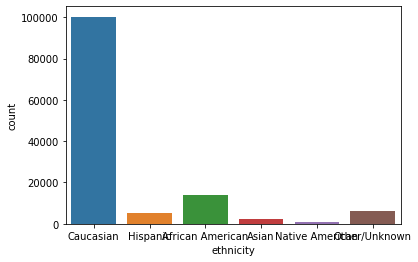

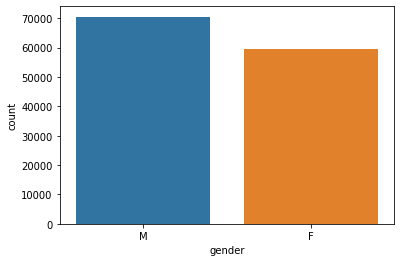

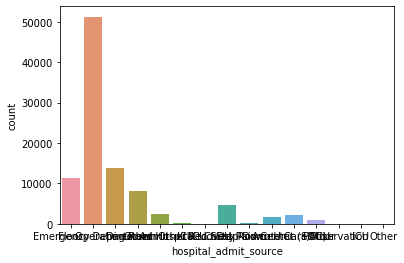

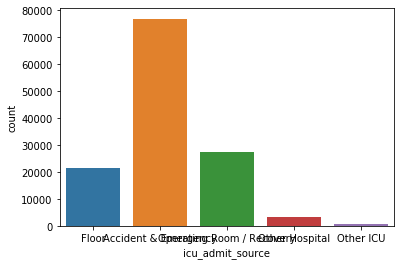

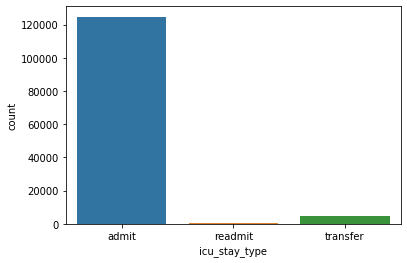

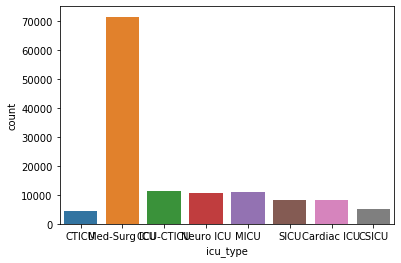

In [189]:
 for i in existing_cat_columns:
        sns.countplot(df[i])
        plt.show()

# Bivariate Analysis on the data

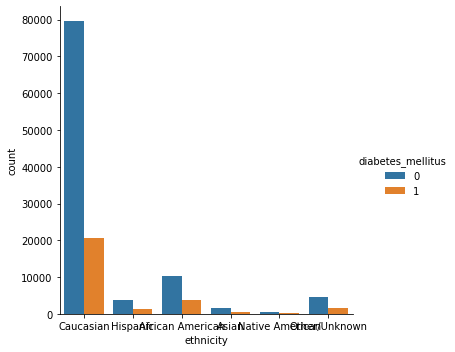

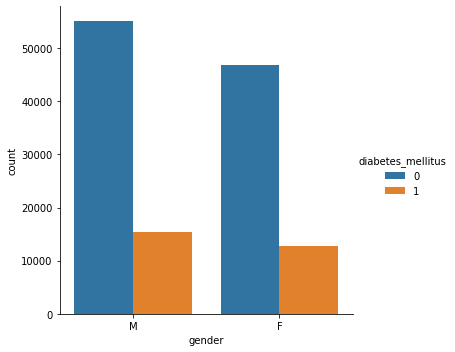

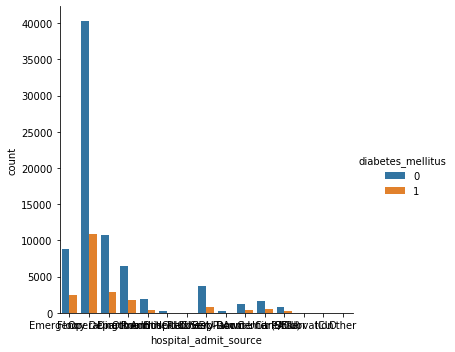

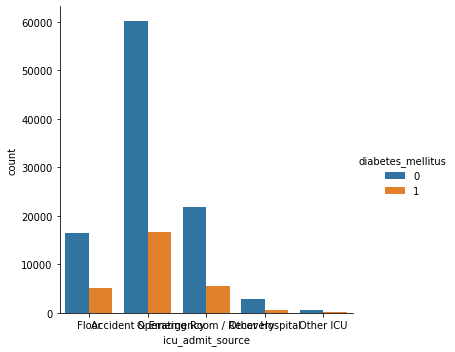

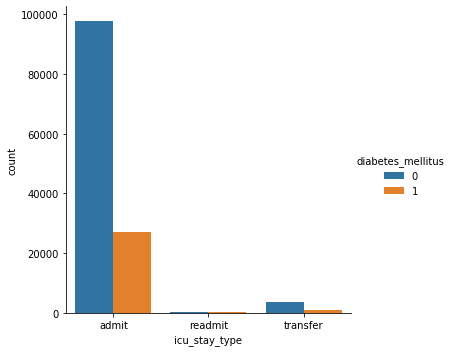

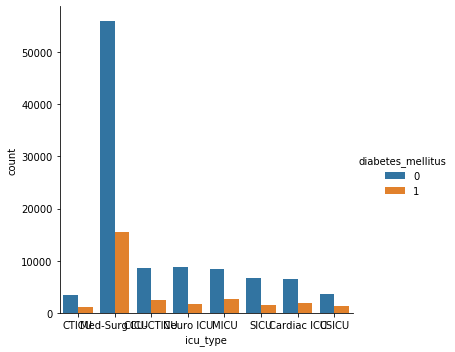

In [190]:
for i in existing_cat_columns:
    sns.catplot(x=i, hue='diabetes_mellitus', kind='count', data=df)
    plt.show()

In [191]:

numerical_Columns=[]
for i in df.columns:
    if df[i].dtype=='int32' or df[i].dtype=='float32' or df[i].dtype=='int64' or df[i].dtype=='float64':
        numerical_Columns.append(i)


In [192]:
numerical_Columns

['encounter_id',
 'hospital_id',
 'age',
 'bmi',
 'elective_surgery',
 'height',
 'icu_id',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bun_apache',
 'creatinine_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',

In [193]:
pd.options.display.float_format = '{:,.4f}'.format

In [194]:
df['d1_diasbp_avg'] = (df['d1_diasbp_max'] +  df['d1_diasbp_min']) / 2
df['d1_diasbp_noninvasive_avg'] = (df['d1_diasbp_noninvasive_max'] + df['d1_diasbp_noninvasive_min']) / 2
df['d1_heartrate_avg'] = (df['d1_heartrate_max'] + df['d1_heartrate_min']) / 2
df['d1_mbp_avg'] = (df['d1_mbp_max'] + df['d1_mbp_min']) / 2
df['d1_mbp_noninvasive_avg'] = (df['d1_mbp_noninvasive_min'] + df['d1_mbp_noninvasive_max']) / 2
df['d1_resprate_avg'] = (df['d1_resprate_min'] + df['d1_resprate_max']) / 2
df['d1_spo2_avg'] = (df['d1_spo2_min'] + df['d1_spo2_max']) / 2
df['d1_sysbp_avg'] = (df['d1_sysbp_min'] + df['d1_sysbp_max']) / 2
df['d1_sysbp_noninvasive_avg'] = (df['d1_sysbp_noninvasive_min'] + df['d1_sysbp_noninvasive_max'])/ 2
df['d1_temp_avg'] = (df['d1_temp_min'] + df['d1_temp_max']) / 2
df['h1_diasbp_avg'] = (df['h1_diasbp_min'] + df['h1_diasbp_max']) / 2
df['h1_diasbp_noninvasive_avg'] = (df['h1_diasbp_noninvasive_min'] + df['h1_diasbp_noninvasive_max']) / 2
df['h1_heartrate_avg'] = (df['h1_heartrate_min'] + df['h1_heartrate_max']) / 2
df['h1_mbp_avg'] = (df['h1_mbp_min'] + df['h1_mbp_max'])/2
df['h1_mbp_noninvasive_avg'] = (df['h1_mbp_noninvasive_min'] + df['h1_mbp_noninvasive_max'])/2
df['h1_resprate_avg'] = (df['h1_resprate_min'] + df['h1_resprate_max'])/2
df['h1_spo2_avg'] = (df['h1_spo2_min'] + df['h1_spo2_max'])/2
df['h1_sysbp_avg'] = (df['h1_sysbp_min'] + df['h1_sysbp_max'])/2
df['h1_sysbp_noninvasive_avg'] = (df['h1_sysbp_noninvasive_min'] + df['h1_sysbp_noninvasive_max'])/2
df['h1_temp_avg'] = (df['h1_temp_min'] + df['h1_temp_max'])/2
df['d1_bun_avg'] = (df['d1_bun_min'] + df['d1_bun_max'])/2
df['d1_calcium_avg'] = (df['d1_calcium_min']+ df['d1_calcium_max'])/2
df['d1_creatinine_avg'] = (df['d1_creatinine_min'] + df['d1_creatinine_max'])/2
df['d1_glucose_avg'] = (df['d1_glucose_min'] + df['d1_glucose_max'])/2
df['d1_hco3_avg'] = (df['d1_hco3_min'] + df['d1_hco3_max'])/2
df['d1_hemaglobin_avg'] = (df['d1_hemaglobin_min'] + df['d1_hemaglobin_max'])/2
df['d1_hematocrit_avg'] = (df['d1_hematocrit_min'] + df['d1_hematocrit_max'])/2
df['d1_platelets_avg'] = (df['d1_platelets_min'] + df['d1_platelets_max'])/2
df['d1_potassium_avg'] = (df['d1_potassium_min'] + df['d1_potassium_max']) /2
df['d1_sodium_avg'] = (df['d1_sodium_min'] + df['d1_sodium_max'])/2
df['d1_wbc_avg'] = (df['d1_wbc_min'] + df['d1_wbc_max'])/2


    

In [195]:
h1AndD1ColumnsToDrop = ['d1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_resprate_max',
 'h1_resprate_min',
 'h1_spo2_max',
 'h1_spo2_min',
 'h1_sysbp_max',
 'h1_sysbp_min',
 'h1_sysbp_noninvasive_max',
 'h1_sysbp_noninvasive_min',
 'h1_temp_max',
 'h1_temp_min',
 'd1_bun_max',
 'd1_bun_min',
 'd1_calcium_max',
 'd1_calcium_min',
 'd1_creatinine_max',
 'd1_creatinine_min',
 'd1_glucose_max',
 'd1_glucose_min',
 'd1_hco3_max',
 'd1_hco3_min',
 'd1_hemaglobin_max',
 'd1_hemaglobin_min',
 'd1_hematocrit_max',
 'd1_hematocrit_min',
 'd1_platelets_max',
 'd1_platelets_min',
 'd1_potassium_max',
 'd1_potassium_min',
 'd1_sodium_max',
 'd1_sodium_min',
 'd1_wbc_max',
 'd1_wbc_min']

In [196]:
df.drop(h1AndD1ColumnsToDrop,axis=1,inplace=True)

In [197]:
df.shape

(130157, 75)

In [198]:

numerical_Columns=[]
for i in df.columns:
    if df[i].dtype=='int32' or df[i].dtype=='float32' or df[i].dtype=='int64' or df[i].dtype=='float64':
        numerical_Columns.append(i)


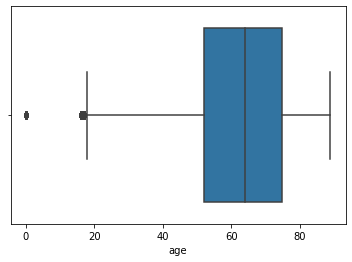

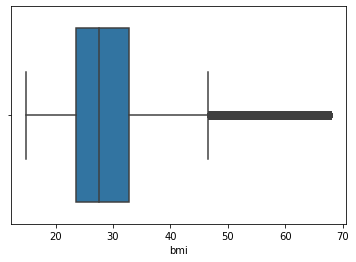

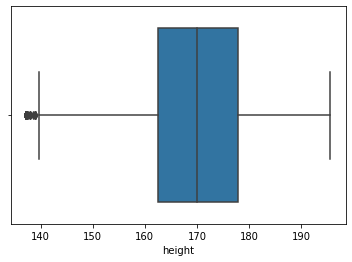

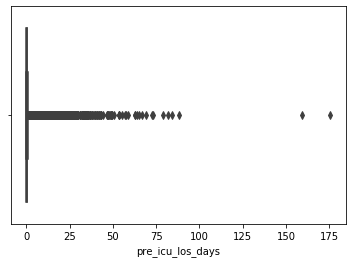

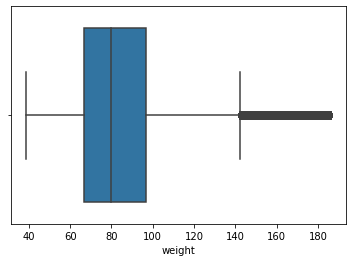

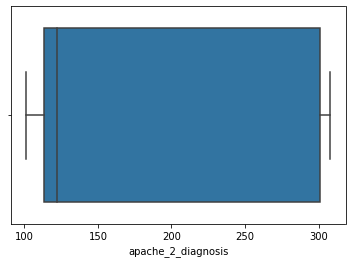

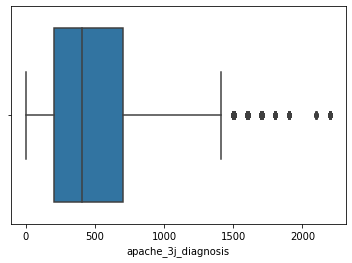

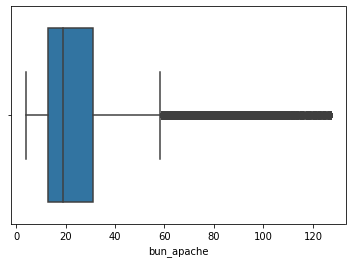

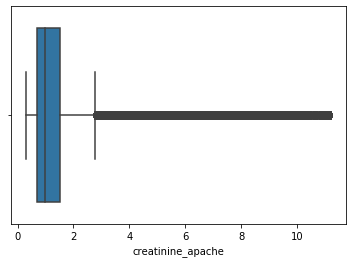

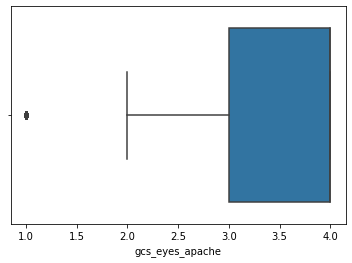

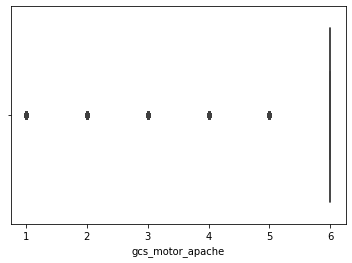

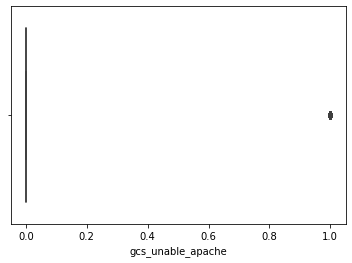

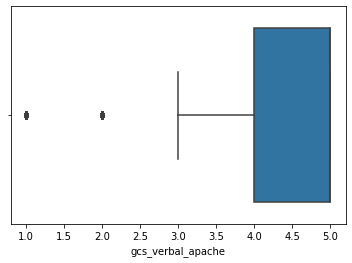

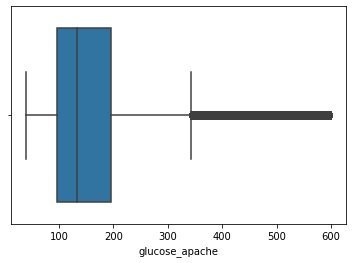

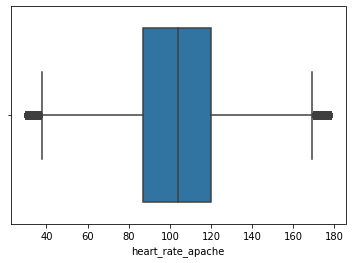

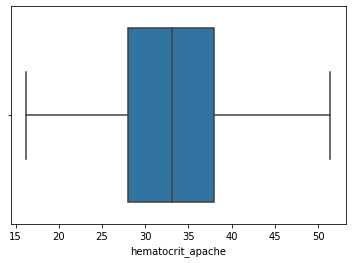

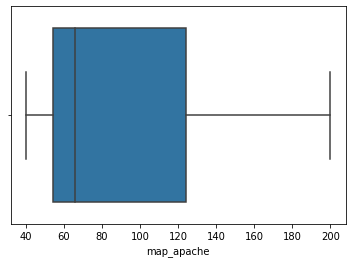

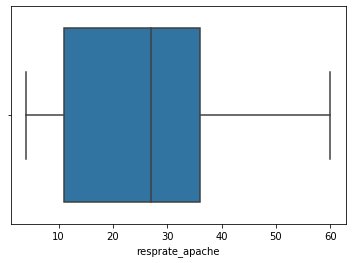

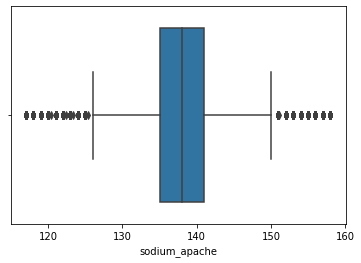

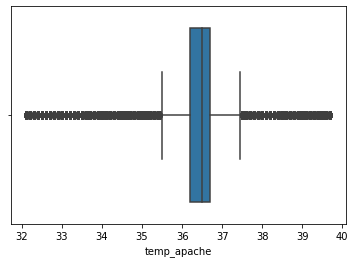

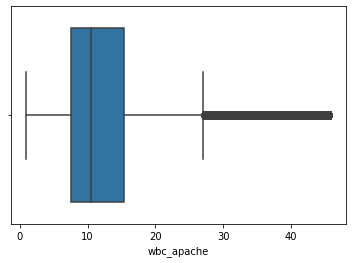

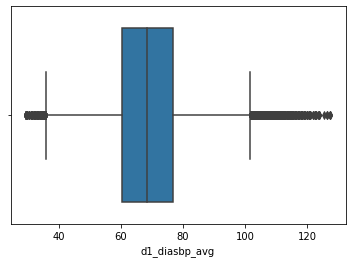

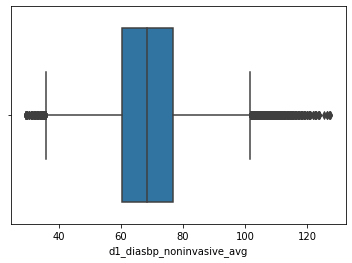

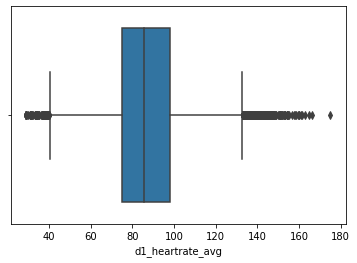

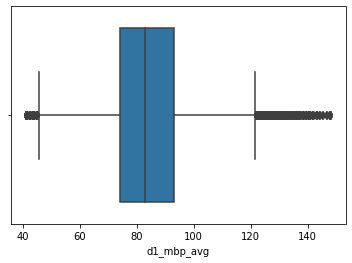

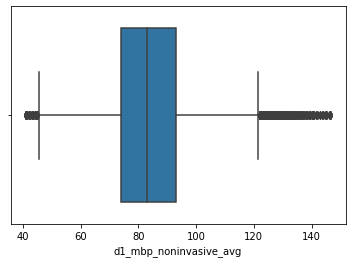

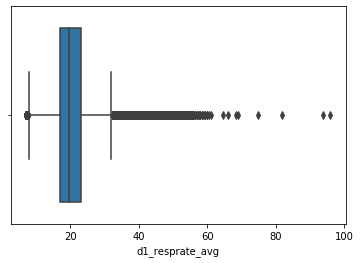

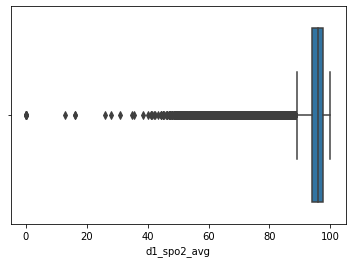

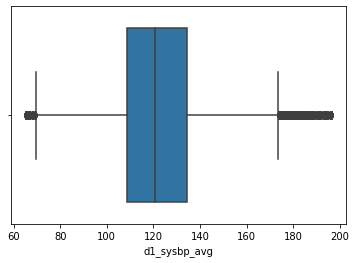

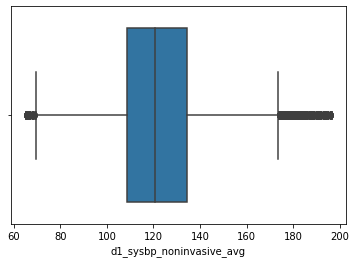

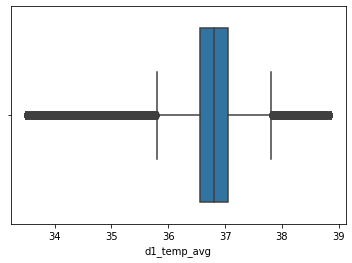

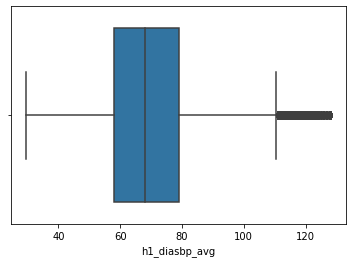

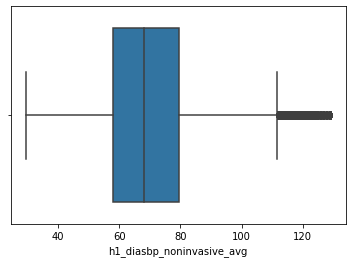

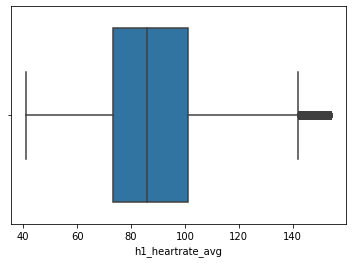

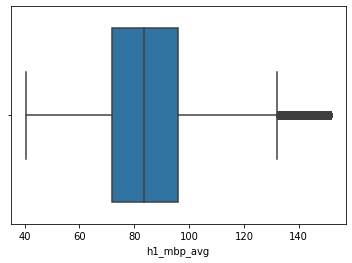

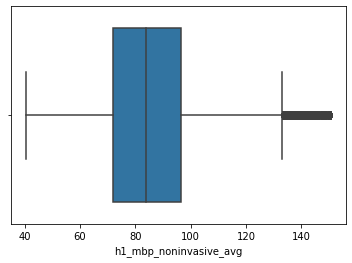

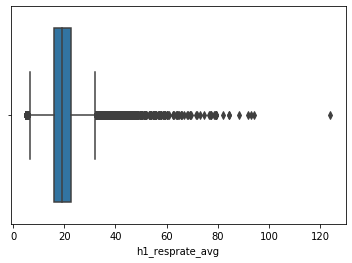

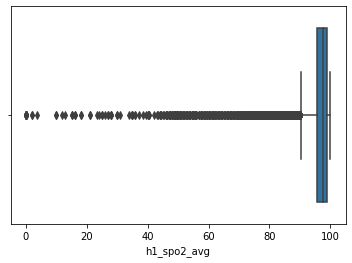

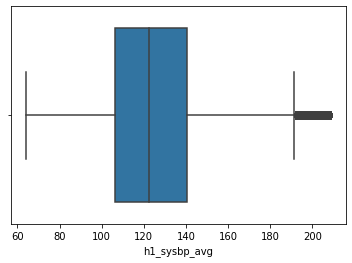

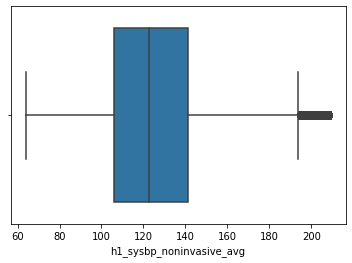

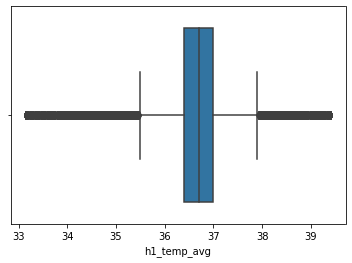

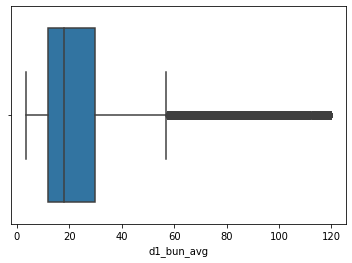

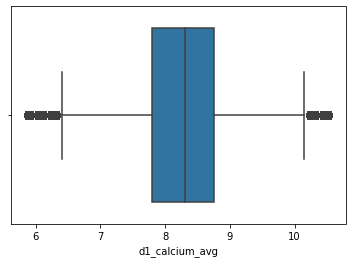

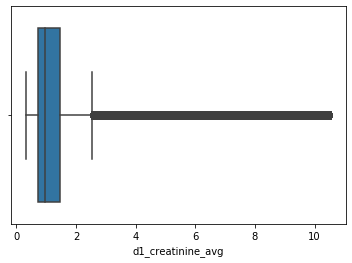

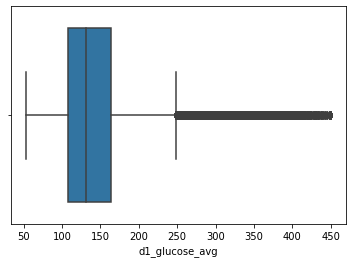

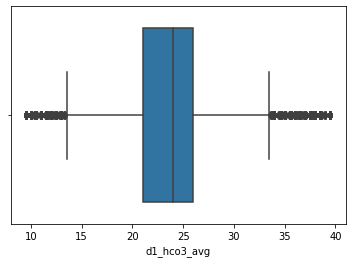

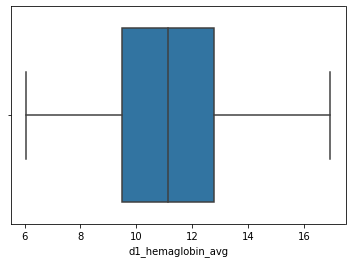

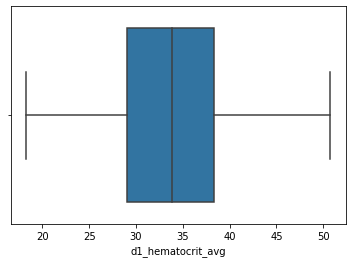

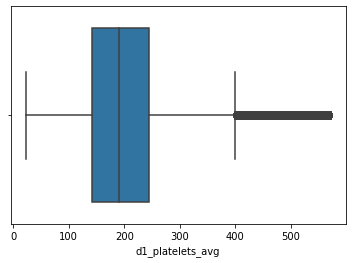

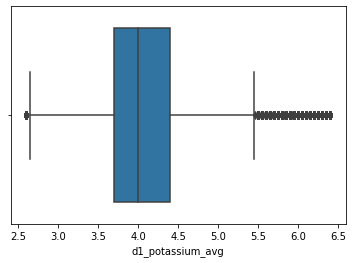

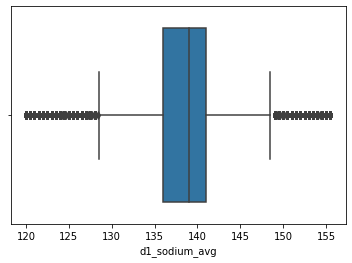

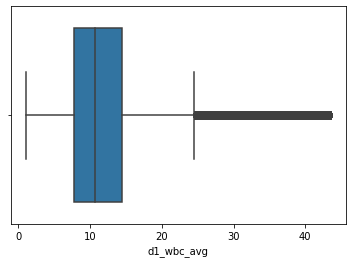

In [199]:
for i in numerical_Columns:
    if df[i].dtype=='float':
        sns.boxplot(df[i])
        plt.show()

## Imputing Mode VALUE for all the category Columns

In [200]:
existing_cat_columns

['ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type']

In [201]:
existing_numerical_columns=[]

for col in df.columns:
    if df[col].dtype =='int32' or df[col].dtype =='float32' or df[col].dtype =='int64' or df[col].dtype =='float64':
        existing_numerical_columns.append(col)

In [202]:
existing_numerical_columns

['encounter_id',
 'hospital_id',
 'age',
 'bmi',
 'elective_surgery',
 'height',
 'icu_id',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bun_apache',
 'creatinine_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'ventilated_apache',
 'wbc_apache',
 'aids',
 'cirrhosis',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis',
 'diabetes_mellitus',
 'd1_diasbp_avg',
 'd1_diasbp_noninvasive_avg',
 'd1_heartrate_avg',
 'd1_mbp_avg',
 'd1_mbp_noninvasive_avg',
 'd1_resprate_avg',
 'd1_spo2_avg',
 'd1_sysbp_avg',
 'd1_sysbp_noninvasive_avg',
 'd1_temp_avg',
 'h1_diasbp_avg',
 'h1_diasbp_noninvasive_avg',
 'h1_heartrate_avg',
 'h1_mbp_avg',
 'h1_mbp_noninv

In [203]:
for i in existing_numerical_columns:
    print(df[i].value_counts())

266238    1
185584    1
232667    1
242908    1
244957    1
         ..
195082    1
193035    1
182796    1
180749    1
262144    1
Name: encounter_id, Length: 130157, dtype: int64
118    4306
19     3885
188    3075
86     2962
7      2944
       ... 
23        7
93        6
95        6
130       2
25        2
Name: hospital_id, Length: 204, dtype: int64
67.0000    3229
68.0000    3065
71.0000    3060
72.0000    2995
66.0000    2977
           ... 
20.0000     473
18.0000     377
17.0000     180
16.0000      85
0.0000       30
Name: age, Length: 75, dtype: int64
67.8150    629
14.8449    627
28.6909    114
27.3593    113
24.0178    113
          ... 
63.5185      1
32.7414      1
20.8086      1
49.5052      1
36.6436      1
Name: bmi, Length: 41453, dtype: int64
0    105448
1     24709
Name: elective_surgery, dtype: int64
177.8000    7357
167.6000    7352
160.0000    7319
172.7000    6800
165.1000    6707
            ... 
150.5000       1
179.3000       1
146.8000       1
181.6100    

Name: d1_bun_avg, Length: 702, dtype: int64
8.5000     5422
8.3000     5253
8.2000     5017
8.4000     4911
8.7000     4816
           ... 
10.4000       5
7.1500        4
5.9500        3
7.1000        3
6.9000        1
Name: d1_calcium_avg, Length: 141, dtype: int64
0.8000    3375
0.7000    3137
0.9000    2864
1.0000    2403
0.6000    2229
          ... 
6.4450       1
4.8050       1
4.3450       1
6.3050       1
9.7700       1
Name: d1_creatinine_avg, Length: 2775, dtype: int64
109.0000    976
107.0000    935
117.0000    932
104.0000    924
108.0000    920
           ... 
445.5000      1
437.5000      1
442.5000      1
399.0000      1
424.5000      1
Name: d1_glucose_avg, Length: 765, dtype: int64
24.0000    9372
25.0000    9174
23.0000    9047
26.0000    8066
22.0000    7327
           ... 
19.1500       1
27.5500       1
28.6000       1
17.3500       1
19.5500       1
Name: d1_hco3_avg, Length: 469, dtype: int64
11.3000    1515
11.7000    1510
11.5000    1472
11.2000    1471
11.000

In [204]:
## readmission_status only labeled as 0
## apache_post_operative is binary
## elective_surgery is binary
## arf_apache : binary
## gcs_eyes_apache is multi nomial
## gcs_motor_apache is multinomial
## gcs_unable_apache is binary
## gcs_verbal_apache is multinomial
## hematocrit_apache is binary
## urineoutput_apache is binary
## d1_arterial_po2_min is binary
## aids is binary
## cirrhosis is binary
## hepatic_failure is binary
## immunosuppression is binary
## leukemia is binary
## lymphoma is binary
## solid_tumor_with_metastasis is binary
## diabetes_mellitus is binary

#binaryColumns=['gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache','apache_post_operative','arf_apache','gcs_unable_apache','hematocrit_apache',
 #           'urineoutput_apache','d1_arterial_po2_min', 'aids','cirrhosis','hepatic_failure','immunosuppression',
  #            'leukemia','lymphoma','solid_tumor_with_metastasis']

binaryColumns = ['elective_surgery','apache_post_operative','gcs_eyes_apache','gcs_motor_apache','gcs_unable_apache','gcs_verbal_apache','intubated_apache','ventilated_apache',
           'aids','cirrhosis','hepatic_failure','immunosuppression',
             'leukemia','lymphoma','solid_tumor_with_metastasis']

In [205]:
## removing readmission_status column as it has same value 
df.drop(['readmission_status'], axis=1,inplace=True)

In [206]:
existing_numerical_columns.remove('readmission_status')

In [207]:
#df = df.loc[ (df['age'] > df['age'].quantile(0.15)) & (df['age'] < df['age'].quantile(0.85)) ]
df = df.loc[(df['age'] < df['age'].quantile(0.85)) ]

In [208]:
df.shape

(105687, 74)

In [209]:
for i in nonBinaryColumns:
    print(df[i].describe().quantile([0.10,0.15,0.25,0.50,0.75,0.85,0.90,1]))

0.1000       54.3503
0.1500       57.5825
0.2500       94.7322
0.5000      138.1701
0.7500      236.1250
0.8500      435.2750
0.9000   30,001.4500
1.0000   98,956.0000
Name: d1_glucose_avg, dtype: float64
0.1000       76.9888
0.1500       93.4563
0.2500       96.0674
0.5000      148.5753
0.7500      298.1750
0.8500      578.6650
0.9000   28,570.7900
1.0000   93,839.0000
Name: glucose_apache, dtype: float64
0.1000        8.7500
0.1500       11.3000
0.2500       15.5000
0.5000       20.9682
0.7500       50.1363
0.8500      114.9178
0.9000   28,439.0815
1.0000   94,518.0000
Name: d1_bun_avg, dtype: float64
0.1000        9.6000
0.1500       12.2500
0.2500       15.7500
0.5000       22.2421
0.7500       53.5000
0.8500      122.1000
0.9000   25,642.6000
1.0000   85,179.0000
Name: bun_apache, dtype: float64
0.1000        0.5930
0.1500        0.7215
0.2500        0.8825
0.5000        1.4107
0.7500        3.7474
0.8500       10.0722
0.9000   28,484.2668
1.0000   94,923.0000
Name: d1_creatinine_

In [210]:
df = df.loc[ (df['bmi'] < df['bmi'].quantile(0.85)) ]

In [211]:
for i in nonBinaryColumns:
    print(df[i].describe().quantile([0.10,0.15,0.25,0.50,0.75,0.85,0.90,1]))

0.1000       53.3997
0.1500       56.2425
0.2500       93.6428
0.5000      136.3191
0.7500      233.8750
0.8500      435.1250
0.9000   24,686.9500
1.0000   81,241.0000
Name: d1_glucose_avg, dtype: float64
0.1000       76.1950
0.1500       92.3290
0.2500       95.0339
0.5000      143.5969
0.7500      294.4250
0.8500      578.4150
0.9000   23,501.9900
1.0000   76,943.0000
Name: glucose_apache, dtype: float64
0.1000        8.7500
0.1500       11.2500
0.2500       14.7500
0.5000       20.4280
0.7500       49.3863
0.8500      114.8678
0.9000   23,427.8815
1.0000   77,814.0000
Name: d1_bun_avg, dtype: float64
0.1000        9.6000
0.1500       12.2500
0.2500       15.7500
0.5000       21.7225
0.7500       52.7500
0.8500      122.0500
0.9000   21,171.7000
1.0000   70,276.0000
Name: bun_apache, dtype: float64
0.1000        0.5860
0.1500        0.7105
0.2500        0.8575
0.5000        1.3583
0.7500        3.7395
0.8500       10.0717
0.9000   23,443.3668
1.0000   78,120.0000
Name: d1_creatinine_

In [212]:
df.shape

(86755, 74)

In [213]:
df = df.loc[ (df['height'] < df['height'].quantile(0.85)) ]

In [214]:
df.shape

(73255, 74)

In [215]:
for col in existing_cat_columns:
     df[col].fillna(df[i].mode()[0],inplace=True)
        

In [216]:
df[existing_cat_columns].isnull().sum(axis=0)

ethnicity                0
gender                   0
hospital_admit_source    0
icu_admit_source         0
icu_stay_type            0
icu_type                 0
dtype: int64

In [217]:
## Converting the binary category columns into numerical columns

In [218]:
existing_numerical_columns=[]

for col in df.columns:
    if df[col].dtype =='int32' or df[col].dtype =='float32' or df[col].dtype =='int64' or df[col].dtype =='float64':
        existing_numerical_columns.append(col)

In [219]:
existing_numerical_columns

['encounter_id',
 'hospital_id',
 'age',
 'bmi',
 'elective_surgery',
 'height',
 'icu_id',
 'pre_icu_los_days',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bun_apache',
 'creatinine_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'ventilated_apache',
 'wbc_apache',
 'aids',
 'cirrhosis',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis',
 'diabetes_mellitus',
 'd1_diasbp_avg',
 'd1_diasbp_noninvasive_avg',
 'd1_heartrate_avg',
 'd1_mbp_avg',
 'd1_mbp_noninvasive_avg',
 'd1_resprate_avg',
 'd1_spo2_avg',
 'd1_sysbp_avg',
 'd1_sysbp_noninvasive_avg',
 'd1_temp_avg',
 'h1_diasbp_avg',
 'h1_diasbp_noninvasive_avg',
 'h1_heartrate_avg',
 'h1_mbp_avg',
 'h1_mbp_noninvasive_avg',
 'h1_respra

In [220]:
for i in existing_numerical_columns:
    print(df[i].value_counts())

272379    1
203638    1
246637    1
207728    1
205681    1
         ..
218496    1
175487    1
173438    1
167291    1
264193    1
Name: encounter_id, Length: 73255, dtype: int64
19     2173
118    1942
161    1776
86     1747
188    1709
       ... 
38        3
25        2
93        2
95        2
130       1
Name: hospital_id, Length: 204, dtype: int64
67.0000    2297
71.0000    2202
72.0000    2173
68.0000    2143
66.0000    2096
           ... 
20.0000     356
18.0000     271
17.0000     144
16.0000      72
0.0000       10
Name: age, Length: 65, dtype: int64
14.8449    415
28.6909    103
27.3593     94
24.2081     87
29.0497     87
          ... 
30.8350      1
35.3021      1
22.1950      1
25.5137      1
25.4291      1
Name: bmi, Length: 22933, dtype: int64
0    58294
1    14961
Name: elective_surgery, dtype: int64
177.8000    5436
167.6000    4926
172.7000    4813
160.0000    4491
165.1000    4418
            ... 
161.1000       1
173.8000       1
147.4000       1
161.4000       

Name: d1_wbc_avg, Length: 4676, dtype: int64


In [221]:
## readmission_status only labeled as 0
## apache_post_operative is binary
## elective_surgery is binary
## arf_apache : binary
## gcs_eyes_apache is multi nomial
## gcs_motor_apache is multinomial
## gcs_unable_apache is binary
## gcs_verbal_apache is multinomial
## hematocrit_apache is binary
## urineoutput_apache is binary
## d1_arterial_po2_min is binary
## aids is binary
## cirrhosis is binary
## hepatic_failure is binary
## immunosuppression is binary
## leukemia is binary
## lymphoma is binary
## solid_tumor_with_metastasis is binary
## diabetes_mellitus is binary

#binaryColumns=['gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache','apache_post_operative','arf_apache','gcs_unable_apache','hematocrit_apache',
 #           'urineoutput_apache','d1_arterial_po2_min', 'aids','cirrhosis','hepatic_failure','immunosuppression',
  #            'leukemia','lymphoma','solid_tumor_with_metastasis']

binaryColumns = ['elective_surgery','apache_post_operative','gcs_eyes_apache','gcs_motor_apache','gcs_unable_apache','gcs_verbal_apache','intubated_apache','ventilated_apache',
           'aids','cirrhosis','hepatic_failure','immunosuppression',
             'leukemia','lymphoma','solid_tumor_with_metastasis']

In [222]:
nonBinaryColumns = [x for x in existing_numerical_columns if x not in binaryColumns]

In [223]:
df['diabetes_mellitus'].value_counts()

0    58515
1    14740
Name: diabetes_mellitus, dtype: int64

In [224]:
nonBinaryColumns.remove('encounter_id')
# 'encounter_id',
 #'hospital_id',
nonBinaryColumns.remove('hospital_id')  

In [225]:
df['gcs_unable_apache'].value_counts()

0.0000    72073
1.0000      884
Name: gcs_unable_apache, dtype: int64

In [226]:
df['apache_post_operative'].value_counts()

0    57129
1    16126
Name: apache_post_operative, dtype: int64

In [227]:
#df['readmission_status'].value_counts()

In [228]:
df['gcs_eyes_apache'].value_counts()

4.0000    51408
3.0000    10482
1.0000     6678
2.0000     3505
Name: gcs_eyes_apache, dtype: int64

In [229]:
df['gcs_eyes_apache'].mean()

3.479333453581785

In [230]:
df.isnull().sum(axis=0)

encounter_id             0
hospital_id              0
age                      0
bmi                      0
elective_surgery         0
                     ...  
d1_hematocrit_avg     8745
d1_platelets_avg     10415
d1_potassium_avg      6930
d1_sodium_avg         7309
d1_wbc_avg            9725
Length: 74, dtype: int64

In [231]:
#existing_numerical_columns.remove('readmission_status')

In [232]:
df[existing_numerical_columns].isnull().sum(axis=0).nonzero()

C:\Users\SANDESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


(array([ 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 28, 37,
        38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
        55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67], dtype=int64),)

In [233]:
nonBinaryColumns

['age',
 'bmi',
 'height',
 'icu_id',
 'pre_icu_los_days',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'arf_apache',
 'bun_apache',
 'creatinine_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'map_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'wbc_apache',
 'diabetes_mellitus',
 'd1_diasbp_avg',
 'd1_diasbp_noninvasive_avg',
 'd1_heartrate_avg',
 'd1_mbp_avg',
 'd1_mbp_noninvasive_avg',
 'd1_resprate_avg',
 'd1_spo2_avg',
 'd1_sysbp_avg',
 'd1_sysbp_noninvasive_avg',
 'd1_temp_avg',
 'h1_diasbp_avg',
 'h1_diasbp_noninvasive_avg',
 'h1_heartrate_avg',
 'h1_mbp_avg',
 'h1_mbp_noninvasive_avg',
 'h1_resprate_avg',
 'h1_spo2_avg',
 'h1_sysbp_avg',
 'h1_sysbp_noninvasive_avg',
 'h1_temp_avg',
 'd1_bun_avg',
 'd1_calcium_avg',
 'd1_creatinine_avg',
 'd1_glucose_avg',
 'd1_hco3_avg',
 'd1_hemaglobin_avg',
 'd1_hematocrit_avg',
 'd1_platelets_avg',
 'd1_potassium_avg',
 'd1_sodium_avg',
 'd1_wbc_avg']

In [234]:
len(nonBinaryColumns)

51

In [235]:
for i in nonBinaryColumns:
    print(df[i].describe().quantile([0.10,0.15,0.25,0.50,0.75,0.85,0.90,1]))

0.1000       10.6746
0.1500       16.9870
0.2500       41.3124
0.5000       60.2467
0.7500       73.0000
0.8500       78.6000
0.9000   22,031.8000
1.0000   73,255.0000
Name: age, dtype: float64
0.1000       11.9224
0.1500       15.2684
0.2500       21.1969
0.5000       26.9867
0.7500       32.4786
0.8500       37.0435
0.9000   22,002.6587
1.0000   73,255.0000
Name: bmi, dtype: float64
0.1000       98.6408
0.1500      138.4650
0.2500      156.1750
0.5000      167.9713
0.7500      177.1950
0.8500      182.5010
0.9000   22,104.5160
1.0000   73,255.0000
Name: height, dtype: float64
0.1000      233.7911
0.1500      305.4022
0.2500      397.2111
0.5000      664.2224
0.7500    1,007.5000
0.8500    1,104.1000
0.9000   22,754.2000
1.0000   73,255.0000
Name: icu_id, dtype: float64
0.1000       -0.0377
0.1500        0.0534
0.2500        0.1302
0.5000        0.6251
0.7500       41.6505
0.8500      151.2616
0.9000   22,087.8637
1.0000   73,255.0000
Name: pre_icu_los_days, dtype: float64
0.1000     

Name: d1_potassium_avg, dtype: float64
0.1000       85.3908
0.1500      120.8000
0.2500      132.0000
0.5000      138.4526
0.7500      144.6250
0.8500      154.7750
0.9000   19,892.6500
1.0000   65,946.0000
Name: d1_sodium_avg, dtype: float64
0.1000        4.6316
0.1500        6.2482
0.2500        7.3916
0.5000       11.2711
0.7500       21.7473
0.8500       42.0396
0.9000   19,089.4423
1.0000   63,530.0000
Name: d1_wbc_avg, dtype: float64


In [236]:
for i in nonBinaryColumns:
    df[i].fillna(df[i].mean(),inplace=True)

In [237]:
df[existing_numerical_columns].isnull().sum(axis=0).nonzero()

C:\Users\SANDESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


(array([15, 16, 17, 18], dtype=int64),)

In [238]:
df[existing_cat_columns].isnull().sum(axis=0).nonzero()

C:\Users\SANDESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


(array([], dtype=int64),)

In [239]:
## prediction variable : diabetes_mellitus

In [240]:
df['diabetes_mellitus'].value_counts()

0    58515
1    14740
Name: diabetes_mellitus, dtype: int64

In [241]:
#Prediction value is quite imbalance . with only 28151 as 1 and over 1 lac records as 0

In [242]:
existing_cat_columns

['ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type']

In [243]:
df[['aids','cirrhosis','hepatic_failure','immunosuppression','leukemia','lymphoma','solid_tumor_with_metastasis', 'diabetes_mellitus' ]]

,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0
10,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
130150,0,0,0,0,0,0,0,0
130151,0,0,0,0,0,0,0,0
130152,0,0,0,0,0,0,0,0
130153,0,0,0,0,0,0,0,0


In [244]:
for col in existing_cat_columns:
     df[col].fillna(df[i].mode()[0],inplace=True)

In [245]:
for col in binaryColumns:
    df[col].fillna(df[i].mode()[0],inplace=True)

In [246]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 10
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [247]:
final_iv, IV  = data_vars(df,df['diabetes_mellitus'])

C:\Users\SANDESH\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [248]:
# Sorting the column in Descending order 
IV = IV.sort_values('IV',ascending=False)

In [249]:
#IV

In [250]:
iv_columns = IV.loc[(IV['IV'] > 0.020) ,'VAR_NAME']

In [251]:
len(iv_columns)

20

In [252]:
final_iv[['VAR_NAME','WOE','IV']].head()

,VAR_NAME,WOE,IV
0,encounter_id,-0.0041,0.0000
1,encounter_id,0.0041,0.0000
2,hospital_id,-0.0406,0.0017
3,hospital_id,0.0409,0.0017
4,age,-0.4088,0.0737


In [253]:
df_woe = df[iv_columns]

In [254]:
#df_woe.corr()

In [255]:
target= df['diabetes_mellitus']

In [256]:
#df_woe.head()

In [257]:
 df.drop(['diabetes_mellitus'],axis=1,inplace=True)

In [258]:
#df_woe = df

In [259]:
existing_cat_columns=[]

for col in df_woe.columns:
    if df_woe[col].dtype =='object':
        existing_cat_columns.append(col)

In [260]:
existing_cat_columns

['ethnicity', 'icu_type']

In [261]:
cat=[]
val=0
dict={}
for col in existing_cat_columns:
    dict[col] = pd.get_dummies(df_woe[col],prefix=col,drop_first=True)

In [262]:
cat_df = pd.concat(dict.values(), axis=1)

In [263]:
cat_df.shape

(73255, 13)

In [264]:
df_woe.drop(existing_cat_columns, axis=1, inplace=True)

C:\Users\SANDESH\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [265]:
len(df_woe.columns)

18

In [266]:
## Concating the dummy columns to main dataframe 

In [267]:
df_woe.shape

(73255, 18)

In [268]:
df_rf = pd.concat([df_woe, cat_df], axis=1)

In [269]:
len(df_rf.columns)

31

In [270]:

#plt.figure(figsize = (25,12))        # Size of the figure
#sns.heatmap(df.corr(),annot = True)
#plt.show()

In [271]:
df_rf.columns

Index(['d1_glucose_avg', 'glucose_apache', 'd1_bun_avg', 'bun_apache',
       'd1_creatinine_avg', 'creatinine_apache', 'bmi', 'weight', 'age',
       'arf_apache', 'd1_hco3_avg', 'd1_sysbp_avg', 'd1_sysbp_noninvasive_avg',
       'd1_hemaglobin_avg', 'd1_potassium_avg', 'd1_hematocrit_avg',
       'h1_diasbp_avg', 'hematocrit_apache', 'ethnicity_African American',
       'ethnicity_Asian', 'ethnicity_Caucasian', 'ethnicity_Hispanic',
       'ethnicity_Native American', 'ethnicity_Other/Unknown',
       'icu_type_CSICU', 'icu_type_CTICU', 'icu_type_Cardiac ICU',
       'icu_type_MICU', 'icu_type_Med-Surg ICU', 'icu_type_Neuro ICU',
       'icu_type_SICU'],
      dtype='object')

In [272]:
#target = df['diabetes_mellitus']

In [273]:
#df.drop(['diabetes_mellitus'],axis=1,inplace=True)

In [274]:
df_rf.head()

,d1_glucose_avg,glucose_apache,d1_bun_avg,bun_apache,d1_creatinine_avg,creatinine_apache,bmi,weight,age,arf_apache,...,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,138.5000,168.0000,30.5000,31.0000,2.3700,2.5100,22.7328,73.9000,68.0000,0,...,0,0,0,0,1,0,0,0,0,0
1,136.5000,145.0000,10.0000,9.0000,0.6350,0.5600,27.4219,70.2000,77.0000,0,...,0,0,0,0,0,0,0,1,0,0
2,143.3554,159.7056,22.2313,23.4231,1.3682,1.4199,31.9527,95.3000,25.0000,0,...,0,0,0,0,0,0,0,1,0,0
9,134.0000,134.0000,10.0000,10.0000,0.8300,0.8300,25.7077,79.0000,50.0000,0,...,0,0,0,0,0,0,0,0,0,0
10,145.5000,159.7056,14.0000,23.4231,0.9000,1.4199,28.2571,67.8000,72.0000,0,...,1,0,0,0,0,0,0,1,0,0


In [275]:
#df_rf.set_index('encounter_id')

In [276]:
#hospital_id= df_rf['hospital_id']

In [278]:
#df_rf.drop(['hospital_id'],axis=1,inplace=True)

In [279]:
#df_rf.drop(['ethnicity'], axis=1,inplace=True)

In [280]:
#df_rf['icu_id'].value_counts()

In [281]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =  train_test_split(df_rf,target,test_size=0.3,random_state=42)

In [282]:
nonBinaryColumns.remove('diabetes_mellitus')

In [283]:
nonBinaryColumns=[]

In [284]:
for i in df_rf.columns:
    if df_rf[i].dtype=='float':
        nonBinaryColumns.append(i)

In [285]:
X_train.columns

Index(['d1_glucose_avg', 'glucose_apache', 'd1_bun_avg', 'bun_apache',
       'd1_creatinine_avg', 'creatinine_apache', 'bmi', 'weight', 'age',
       'arf_apache', 'd1_hco3_avg', 'd1_sysbp_avg', 'd1_sysbp_noninvasive_avg',
       'd1_hemaglobin_avg', 'd1_potassium_avg', 'd1_hematocrit_avg',
       'h1_diasbp_avg', 'hematocrit_apache', 'ethnicity_African American',
       'ethnicity_Asian', 'ethnicity_Caucasian', 'ethnicity_Hispanic',
       'ethnicity_Native American', 'ethnicity_Other/Unknown',
       'icu_type_CSICU', 'icu_type_CTICU', 'icu_type_Cardiac ICU',
       'icu_type_MICU', 'icu_type_Med-Surg ICU', 'icu_type_Neuro ICU',
       'icu_type_SICU'],
      dtype='object')

In [286]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[nonBinaryColumns] = scaler.fit_transform(X_train[nonBinaryColumns])
X_test[nonBinaryColumns] = scaler.fit_transform(X_test[nonBinaryColumns])

C:\Users\SANDESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\SANDESH\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\SANDESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [287]:
# oversampling process 

In [288]:
from imblearn.over_sampling import SMOTE

In [289]:
X_train.shape

(51278, 31)

In [290]:

sm = SMOTE(random_state=2)
X_train_log, y_train_log = sm.fit_sample(X_train, y_train.ravel())

In [291]:
from collections import Counter

In [292]:
Counter(y_train_log)

Counter({0: 41067, 1: 41067})

In [293]:
logisiticRegression = LogisticRegression()
clf = logisiticRegression.fit(X_train_log,y_train_log)

C:\Users\SANDESH\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [294]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print('\n')
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print('\n')
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print('\n')
    print("F1 Score = " ,f1_score(y_actual, y_predicted)) 
    print('\n')
    pass

In [295]:
generate_model_report(y_train_log, clf.predict(X_train_log))

Accuracy =  0.7647989870212093


Precision =  0.7845312540882807


Recall =  0.7301239437991575


F1 Score =  0.7563504275660268




In [296]:
generate_model_report(y_test, clf.predict(X_test))

Accuracy =  0.758929790235246


Precision =  0.4364567840026442


Recall =  0.5831309339810112


F1 Score =  0.49924385633270324




In [139]:
from sklearn import metrics
def evaluate_metric_of_model(converted,predicted):

    # Confusion matrix 
    confusion = metrics.confusion_matrix(converted,predicted)
    print('--'*20)
    print('confusion_matrix')
    print(confusion)


    # Let's check the overall accuracy.
    print('--'*20)
    print('accuracy')

    print(metrics.accuracy_score(converted,predicted).round(2))

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives


    # Let's see the sensitivity of our logistic regression model
    print('--'*20)
    print('sensitivity')
    print((TP / float(TP+FN)).round(2))


    # Let us calculate specificity
    print('--'*20)
    print('specificity')
    print((TN / float(TN+FP)).round(2))


    # Calculate false postive rate 
    print('--'*20)
    print('False Positive Rate')
    print((FP/ float(TN+FP)).round(2))


    # positive predictive value 
    print('--'*20)
    print('Positive predictive value')
    print ((TP / float(TP+FP)).round(2))
    # Negative predictive value
    print('--'*20)
    print('Negative predictive value')
    print ((TN / float(TN+ FN)).round(2))
    generate_model_report(converted,predicted)
	
	

In [140]:

evaluate_metric_of_model(y_test,clf.predict(X_test))

----------------------------------------
confusion_matrix
[[14038  3410]
 [ 1888  2641]]
----------------------------------------
accuracy
0.76
----------------------------------------
sensitivity
0.58
----------------------------------------
specificity
0.8
----------------------------------------
False Positive Rate
0.2
----------------------------------------
Positive predictive value
0.44
----------------------------------------
Negative predictive value
0.88
Accuracy =  0.758929790235246


Precision =  0.4364567840026442


Recall =  0.5831309339810112


F1 Score =  0.49924385633270324




In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
col = X_train.columns

In [ ]:
col = col.drop('d1_sysbp_noninvasive_max',1)

sm = SMOTE(random_state=2)
X_train_log,y_train_log = sm.fit_sample(X_train[col],y_train.ravel())
logisiticRegression = LogisticRegression()
clf = logisiticRegression.fit(X_train_log,y_train_log)
generate_model_report(y_train_log, clf.predict(X_train_log))
print('\n')
generate_model_report(y_test, clf.predict(X_test[col]))

In [ ]:
def VIFCalculator(col):
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
    

In [ ]:
print(VIFCalculator(col))

In [ ]:
col = col.drop('d1_creatinine_max',1)

sm = SMOTE(random_state=2)
X_train_log,y_train_log = sm.fit_sample(X_train[col],y_train.ravel())
logisiticRegression = LogisticRegression()
clf = logisiticRegression.fit(X_train_log,y_train_log)
generate_model_report(y_train_log, clf.predict(X_train_log))
print('\n')
generate_model_report(y_test, clf.predict(X_test[col]))

In [ ]:
print(VIFCalculator(col))

In [ ]:
col = col.drop('d1_bun_max',1)

sm = SMOTE(random_state=2)
X_train_log,y_train_log = sm.fit_sample(X_train[col],y_train.ravel())
logisiticRegression = LogisticRegression()
clf = logisiticRegression.fit(X_train_log,y_train_log)
generate_model_report(y_train_log, clf.predict(X_train_log))
print('\n')
generate_model_report(y_test, clf.predict(X_test[col]))

In [ ]:
print(VIFCalculator(col))

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import scale

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [142]:

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 30, 5),
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(100, 300, 100),
    'criterion': ["entropy", "gini"]
}

n_folds = 5
folds = KFold(n_splits = 3, shuffle = True, random_state = 4)

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight={0:0.1, 1: 0.9})
grid_search_70_30_dec_Over = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = folds, verbose = 1,n_jobs=-1)
grid_search_70_30_dec_Over.fit(X_train_log,y_train_log)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.2min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
     

In [143]:
# Find the best parameters
print(grid_search_70_30_dec_Over.best_params_)
print(grid_search_70_30_dec_Over.best_score_)

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 100, 'min_samples_split': 100}
0.6466384201426937


In [297]:
dec_70_30_Over = DecisionTreeClassifier(criterion="entropy",max_depth=15,min_samples_leaf=100,
min_samples_split=100)

In [298]:
dec_70_30_Over.fit(X_train_log,y_train_log)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [299]:
# Predict the target variable using model
y_pred_dec_70_30_Over = dec_70_30_Over.predict(X_test)

In [300]:
evaluate_metric_of_model(y_test,y_pred_dec_70_30_Over)

----------------------------------------
confusion_matrix
[[11920  5528]
 [ 1171  3358]]
----------------------------------------
accuracy
0.7
----------------------------------------
sensitivity
0.74
----------------------------------------
specificity
0.68
----------------------------------------
False Positive Rate
0.32
----------------------------------------
Positive predictive value
0.38
----------------------------------------
Negative predictive value
0.91
Accuracy =  0.6951813259316558


Precision =  0.3778978167904569


Recall =  0.7414440273791124


F1 Score =  0.500633619083116




In [140]:
from xgboost import XGBClassifier
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearchXgb1_70_30_Over = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)


gsearchXgb1_70_30_Over.fit(X_train_log,y_train_log)


 #Find the best parameters
print(gsearchXgb1_70_30_Over.best_params_)
print(gsearchXgb1_70_30_Over.best_score_)

KeyboardInterrupt: 

In [178]:

xgb2_70_30_Over = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=9,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
 

xgb2_70_30_Over.fit(X_train_log, y_train_log)
 

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

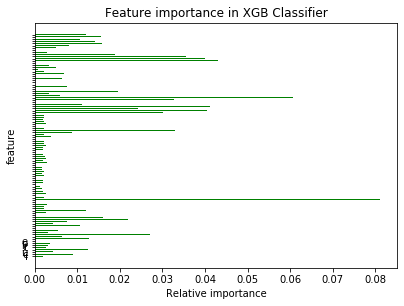

<Figure size 360x360 with 0 Axes>

In [179]:

#modelname.feature_importance_
y = xgb2_70_30_Over.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in XGB Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

In [180]:

# make predictions for test data
y_pred = xgb2_70_30_Over.predict(X_train_log)
predictions_70_30_xgb_over_train = [round(value) for value in y_pred]

evaluate_metric_of_model(y_train_log,predictions_70_30_xgb_over_train)


----------------------------------------
confusion_matrix
[[40307   760]
 [ 2281 38786]]
----------------------------------------
accuracy
0.96
----------------------------------------
sensitivity
0.94
----------------------------------------
specificity
0.98
----------------------------------------
False Positive Rate
0.02
----------------------------------------
Positive predictive value
0.98
----------------------------------------
Negative predictive value
0.95
Accuracy =  0.9629751381888134


Precision =  0.9807818742729986


Recall =  0.9444566196702949


F1 Score =  0.9622765558904891




In [181]:

# make predictions for test data
y_pred = xgb2_70_30_Over.predict(X_test)
predictions_70_30_xgb_over_test = [round(value) for value in y_pred]

evaluate_metric_of_model(y_test,predictions_70_30_xgb_over_test)


----------------------------------------
confusion_matrix
[[13846  3602]
 [ 1409  3120]]
----------------------------------------
accuracy
0.77
----------------------------------------
sensitivity
0.69
----------------------------------------
specificity
0.79
----------------------------------------
False Positive Rate
0.21
----------------------------------------
Positive predictive value
0.46
----------------------------------------
Negative predictive value
0.91
Accuracy =  0.771988897483733


Precision =  0.46414757512645044


Recall =  0.6888937955398543


F1 Score =  0.5546173673451249




In [249]:
## ANN

In [141]:
len(X_train_log.columns)

103

In [142]:
import tensorflow as tf
import pickle
import gzip
import h5py
import sklearn
import sklearn.datasets
import scipy

import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
import eli5
from xgboost import XGBClassifier

from eli5.sklearn import PermutationImportance

C:\Users\SANDESH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\SANDESH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [153]:
classifier = Sequential()
classifier.add(Dense(input_dim=103,activation='relu', init='uniform', output_dim=50))
classifier.add(Dense(activation='relu', init='uniform', output_dim=20))
classifier.add(Dropout(0.3))
classifier.add(Dense(activation='sigmoid', init='uniform', output_dim=1))
classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(np.array(X_train_log),np.array(y_train_log) , batch_size=100, nb_epoch=100)

C:\Users\SANDESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=103, activation="relu", units=50, kernel_initializer="uniform")`
  
C:\Users\SANDESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SANDESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """
C:\Users\SANDESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Epoch 1/100
82134/82134 [==============================] - 2s 30us/step - loss: 0.9158 - acc: 0.4990
Epoch 2/100
82134/82134 [==============================] - 2s 28us/step - loss: 0.6932 - acc: 0.5003
Epoch 3/100
82134/82134 [==============================] - 2s 26us/step - loss: 0.6932 - acc: 0.4997
Epoch 4/100
82134/82134 [==============================] - 2s 25us/step - loss: 0.6932 - acc: 0.4980
Epoch 5/100
82134/82134 [==============================] - 2s 25us/step - loss: 0.6932 - acc: 0.4984
Epoch 6/100
82134/82134 [==============================] - 2s 25us/step - loss: 0.6932 - acc: 0.5003
Epoch 7/100
82134/82134 [==============================] - 2s 24us/step - loss: 0.6932 - acc: 0.4961
Epoch 8/100
82134/82134 [==============================] - 2s 25us/step - loss: 0.6932 - acc: 0.4982
Epoch 9/100
82134/82134 [==============================] - 2s 25us/step - loss: 0.6932 - acc: 0.4989
Epoch 10/100
82134/82134 [==============================] - 2s 25us/step - loss: 0.6932 - a

In [154]:
y_train_pred = classifier.predict(X_train_log)
y_train_pred = y_train_pred.reshape(-1)

In [155]:
y_train_pred = pd.Series(y_train_pred)

In [156]:
y_test_pred = pd.Series(classifier.predict(X_test).reshape(-1))

In [157]:
y_train_val_70_30_Under = y_train_pred.map(lambda x : 1 if x > 0.5 else 0 )


In [158]:
evaluate_metric_of_model(y_train_log,y_train_val_70_30_Under)

----------------------------------------
confusion_matrix
[[41067     0]
 [41067     0]]
----------------------------------------
accuracy
0.5
----------------------------------------
sensitivity
0.0
----------------------------------------
specificity
1.0
----------------------------------------
False Positive Rate
0.0
----------------------------------------
Positive predictive value
nan
----------------------------------------
Negative predictive value
0.5
Accuracy =  0.5


Precision =  0.0


Recall =  0.0


F1 Score =  0.0




C:\Users\SANDESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide
C:\Users\SANDESH\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
final_pred = pd.DataFrame({'converted':y_train_log,'prob':y_train_pred})
final_pred['predicted'] = final_pred.prob.map(lambda x: 1 if x > 0.5 else 0)

In [160]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    final_pred[i]= final_pred.prob.map(lambda x: 1 if x > i else 0)
final_pred.head()

,converted,prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.4997,0,1,1,1,1,1,0,0,0,0,0
1,0,0.4997,0,1,1,1,1,1,0,0,0,0,0
2,0,0.4997,0,1,1,1,1,1,0,0,0,0,0
3,0,0.4997,0,1,1,1,1,1,0,0,0,0,0
4,0,0.4997,0,1,1,1,1,1,0,0,0,0,0


In [161]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','preci','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(final_pred.converted, final_pred[i] )
    total1=sum(sum(cm1))
    accuracy = ((cm1[0,0]+cm1[1,1])/total1).round(2)
    
    speci = (cm1[0,0]/(cm1[0,0]+cm1[0,1])).round(2)
    sensi = (cm1[1,1]/(cm1[1,0]+cm1[1,1])).round(2)
    preci=(cm1[1,1]/(cm1[1,1]+cm1[0,1])).round(2)
    recall = (cm1[1,1]/(cm1[1,0]+cm1[1,1])).round(2)
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,preci,recall]

C:\Users\SANDESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in longlong_scalars


In [162]:

final_pred['predicted'] = final_pred.prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
final_pred.head()

,converted,prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.4997,0,1,1,1,1,1,0,0,0,0,0
1,0,0.4997,0,1,1,1,1,1,0,0,0,0,0
2,0,0.4997,0,1,1,1,1,1,0,0,0,0,0
3,0,0.4997,0,1,1,1,1,1,0,0,0,0,0
4,0,0.4997,0,1,1,1,1,1,0,0,0,0,0


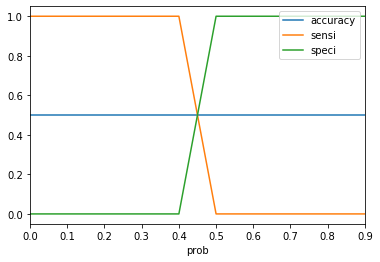

In [163]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [164]:
y_train_val_70_30_Under = y_train_pred.map(lambda x : 1 if x > 0.53 else 0 )

In [165]:
evaluate_metric_of_model(y_train_log,y_train_val_70_30_Under)

----------------------------------------
confusion_matrix
[[41067     0]
 [41067     0]]
----------------------------------------
accuracy
0.5
----------------------------------------
sensitivity
0.0
----------------------------------------
specificity
1.0
----------------------------------------
False Positive Rate
0.0
----------------------------------------
Positive predictive value
nan
----------------------------------------
Negative predictive value
0.5
Accuracy =  0.5


Precision =  0.0


Recall =  0.0


F1 Score =  0.0




C:\Users\SANDESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


In [166]:
y_test_pred_val_70_30_Under = y_test_pred.map(lambda x : 1 if x > 0.53 else 0 )

In [167]:
evaluate_metric_of_model(y_test ,y_test_pred_val_70_30_Under)

----------------------------------------
confusion_matrix
[[17448     0]
 [ 4529     0]]
----------------------------------------
accuracy
0.79
----------------------------------------
sensitivity
0.0
----------------------------------------
specificity
1.0
----------------------------------------
False Positive Rate
0.0
----------------------------------------
Positive predictive value
nan
----------------------------------------
Negative predictive value
0.79
Accuracy =  0.7939209173226555


Precision =  0.0


Recall =  0.0


F1 Score =  0.0




C:\Users\SANDESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


In [301]:
from lightgbm import LGBMClassifier
from sklearn import metrics

In [302]:
lgbmc = LGBMClassifier()

In [303]:
lgbmc.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [304]:
lgbmc.score(X_train, y_train)

0.8520808143843364

In [305]:
lgbm_pred = lgbmc.predict(X_train)

In [306]:
evaluate_metric_of_model(y_train ,lgbm_pred)

----------------------------------------
confusion_matrix
[[39126  1941]
 [ 5644  4567]]
----------------------------------------
accuracy
0.85
----------------------------------------
sensitivity
0.45
----------------------------------------
specificity
0.95
----------------------------------------
False Positive Rate
0.05
----------------------------------------
Positive predictive value
0.7
----------------------------------------
Negative predictive value
0.87
Accuracy =  0.8520808143843364


Precision =  0.7017516902274125


Recall =  0.44726275585153263


F1 Score =  0.5463245409414439




In [307]:
ytest_pred_lgbmc = lgbmc.predict(X_test)

In [308]:
evaluate_metric_of_model(y_test ,ytest_pred_lgbmc)

----------------------------------------
confusion_matrix
[[16444  1004]
 [ 2845  1684]]
----------------------------------------
accuracy
0.82
----------------------------------------
sensitivity
0.37
----------------------------------------
specificity
0.94
----------------------------------------
False Positive Rate
0.06
----------------------------------------
Positive predictive value
0.63
----------------------------------------
Negative predictive value
0.85
Accuracy =  0.8248623560995586


Precision =  0.6264880952380952


Recall =  0.3718260101567675


F1 Score =  0.46667590411528326




In [309]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from catboost import Pool, cv, CatBoostClassifier, CatBoostRegressor

from sklearn.metrics import mean_squared_error, classification_report
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

In [310]:
catboostclassifier = CatBoostClassifier(eval_metric="AUC", depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)

In [311]:
catboostclassifier.fit(X_train,y_train)

0:	total: 144ms	remaining: 1m 11s
1:	total: 283ms	remaining: 1m 10s
2:	total: 448ms	remaining: 1m 14s
3:	total: 588ms	remaining: 1m 12s
4:	total: 753ms	remaining: 1m 14s
5:	total: 912ms	remaining: 1m 15s
6:	total: 1.1s	remaining: 1m 17s
7:	total: 1.25s	remaining: 1m 17s
8:	total: 1.44s	remaining: 1m 18s
9:	total: 1.59s	remaining: 1m 17s
10:	total: 1.76s	remaining: 1m 18s
11:	total: 1.93s	remaining: 1m 18s
12:	total: 2.12s	remaining: 1m 19s
13:	total: 2.3s	remaining: 1m 19s
14:	total: 2.47s	remaining: 1m 19s
15:	total: 2.64s	remaining: 1m 19s
16:	total: 2.79s	remaining: 1m 19s
17:	total: 2.96s	remaining: 1m 19s
18:	total: 3.1s	remaining: 1m 18s
19:	total: 3.26s	remaining: 1m 18s
20:	total: 3.41s	remaining: 1m 17s
21:	total: 3.57s	remaining: 1m 17s
22:	total: 3.71s	remaining: 1m 17s
23:	total: 3.88s	remaining: 1m 16s
24:	total: 4.02s	remaining: 1m 16s
25:	total: 4.17s	remaining: 1m 16s
26:	total: 4.32s	remaining: 1m 15s
27:	total: 4.48s	remaining: 1m 15s
28:	total: 4.62s	remaining: 1m 15

238:	total: 38.2s	remaining: 41.8s
239:	total: 38.4s	remaining: 41.6s
240:	total: 38.6s	remaining: 41.4s
241:	total: 38.7s	remaining: 41.3s
242:	total: 38.9s	remaining: 41.1s
243:	total: 39s	remaining: 40.9s
244:	total: 39.1s	remaining: 40.7s
245:	total: 39.3s	remaining: 40.6s
246:	total: 39.5s	remaining: 40.4s
247:	total: 39.6s	remaining: 40.2s
248:	total: 39.7s	remaining: 40.1s
249:	total: 39.9s	remaining: 39.9s
250:	total: 40s	remaining: 39.7s
251:	total: 40.2s	remaining: 39.5s
252:	total: 40.3s	remaining: 39.4s
253:	total: 40.5s	remaining: 39.2s
254:	total: 40.6s	remaining: 39s
255:	total: 40.8s	remaining: 38.9s
256:	total: 40.9s	remaining: 38.7s
257:	total: 41.1s	remaining: 38.5s
258:	total: 41.2s	remaining: 38.4s
259:	total: 41.4s	remaining: 38.2s
260:	total: 41.5s	remaining: 38s
261:	total: 41.7s	remaining: 37.8s
262:	total: 41.8s	remaining: 37.7s
263:	total: 41.9s	remaining: 37.5s
264:	total: 42.1s	remaining: 37.3s
265:	total: 42.2s	remaining: 37.2s
266:	total: 42.4s	remaining:

475:	total: 1m 15s	remaining: 3.8s
476:	total: 1m 15s	remaining: 3.64s
477:	total: 1m 15s	remaining: 3.48s
478:	total: 1m 15s	remaining: 3.32s
479:	total: 1m 15s	remaining: 3.16s
480:	total: 1m 16s	remaining: 3s
481:	total: 1m 16s	remaining: 2.85s
482:	total: 1m 16s	remaining: 2.69s
483:	total: 1m 16s	remaining: 2.53s
484:	total: 1m 16s	remaining: 2.37s
485:	total: 1m 16s	remaining: 2.21s
486:	total: 1m 17s	remaining: 2.06s
487:	total: 1m 17s	remaining: 1.9s
488:	total: 1m 17s	remaining: 1.74s
489:	total: 1m 17s	remaining: 1.58s
490:	total: 1m 17s	remaining: 1.42s
491:	total: 1m 17s	remaining: 1.26s
492:	total: 1m 17s	remaining: 1.11s
493:	total: 1m 18s	remaining: 948ms
494:	total: 1m 18s	remaining: 790ms
495:	total: 1m 18s	remaining: 632ms
496:	total: 1m 18s	remaining: 474ms
497:	total: 1m 18s	remaining: 316ms
498:	total: 1m 18s	remaining: 158ms
499:	total: 1m 18s	remaining: 0us


In [312]:
catboostclassifier.score(X_test,y_test)

0.8192655958502071